In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
n = 10
N = n * n
size = 3 * n
v_m = 1.5
r_c = 3
h = 10 ** -3
h_2 = h / 2
h2 = h ** 2
tau = 100
time = 100

In [22]:
def init():
    a = size / (np.sqrt(N))
    h_d = np.arange(a / 4, size / 2, a / 2)
    v_d = np.arange(a / 2, size, a)
    x = np.repeat([h_d], N // len(h_d), axis=0).flatten()
    y = np.repeat([v_d], N // len(v_d)).flatten()
    v_x = np.random.uniform(-v_m, v_m, N)
    v_y = np.random.uniform(-v_m, v_m, N)
    v_com_x = np.mean(v_x)
    v_com_y = np.mean(v_y)
    v_x = v_x - v_com_x
    v_y = v_y - v_com_y
    return x, y, v_x, v_y


In [23]:
def info(x, y):
    x[np.abs(x - size) < r_c] -= size
    x[np.abs(x + size) < r_c] += size
    mask_x = (np.abs(x) < r_c)
    y[np.abs(y - size) < r_c] -= size
    y[np.abs(y + size) < r_c] += size
    mask_y = (np.abs(y) < r_c)
    final_mask = mask_x & mask_y
    return x[final_mask], y[final_mask]

In [24]:
def acceleration(x, y, v_x, v_y):
    a_x = np.zeros(N)
    a_y = np.zeros(N)
    f = 0
    potential = 0
    kinetic = (v_x * v_x + v_y * v_y).sum() / 2
    temp = kinetic / (N - 1)
    for m in range(N):
        dx = x - x[m]
        dy = y - y[m]
        delta_x, delta_y = info(dx, dy)
        r = (delta_x * delta_x) + (delta_y * delta_y)
        mask_r = (r != 0)
        r = r[mask_r]
        delta_x = delta_x[mask_r]
        delta_y = delta_y[mask_r]
        r6 = r * r * r
        r12 = r6 * r6
        potential += np.sum((1 / r12 - 1 / r6)) * 2
        a = 4 * (-12 / r12 + 6 / r6)
        a_r = a / r
        ax = sum(a_r * delta_x)
        ay = sum(a_r * delta_y)
        f = sum(ax * delta_x + ay * delta_y)
        a_x[m] = ax
        a_y[m] = ay
    return a_x, a_y, potential, kinetic, temp, kinetic - f * 0.25

In [25]:
def MD(loc_x, loc_y, speed_x, speed_y):
    temp = np.zeros(time)
    pressure = np.zeros(time)
    acc_x, acc_y, u1, k1, temp[0], pressure[0] = acceleration(loc_x, loc_y, speed_x, speed_y)
    for t in range(1, time):
        loc_x += speed_x * h + 1 / 2 * acc_x * h2
        loc_y += speed_y * h + 1 / 2 * acc_y * h2
        loc_x = loc_x % size
        loc_y = loc_y % size
        speed_x += (acc_x * h_2)
        speed_y += (acc_y * h_2)
        acc_x, acc_y, u1, k1, temp[t], pressure[t] = acceleration(loc_x, loc_y, speed_x, speed_y)
        speed_x += (acc_x * h_2)
        speed_y += (acc_y * h_2)
    return loc_x, loc_y, speed_x, speed_y, k1, u1, k1 + u1, np.mean(temp), np.mean(pressure)

In [26]:
def ansambel():
    jonbeshi = np.zeros(tau)
    potansiel = np.zeros(tau)
    total = np.zeros(tau)
    a_dama = []
    a_feshar = []
    loc_x, loc_y, speed_x, speed_y = init()
    loc_x, loc_y, speed_x, speed_y, jonbeshi[0], potansiel[0], total[0], dama, feshar = MD(loc_x, loc_y, speed_x, speed_y)
    for i in range(1, tau):
        loc_x, loc_y, speed_x, speed_y, jonbeshi[i], potansiel[i], total[i], dama, feshar = MD(loc_x, loc_y, speed_x, speed_y)
        # plt.scatter(loc_x, loc_y)  # graphs are available in guid file
        # plt.title('t=%s' % i)
        # plt.xlim([0, size])
        # plt.ylim([0, size])
        # plt.show()
        if i > 10:
            a_dama.append(dama)
            a_feshar.append(feshar)
    return jonbeshi, potansiel, total, a_dama, a_feshar

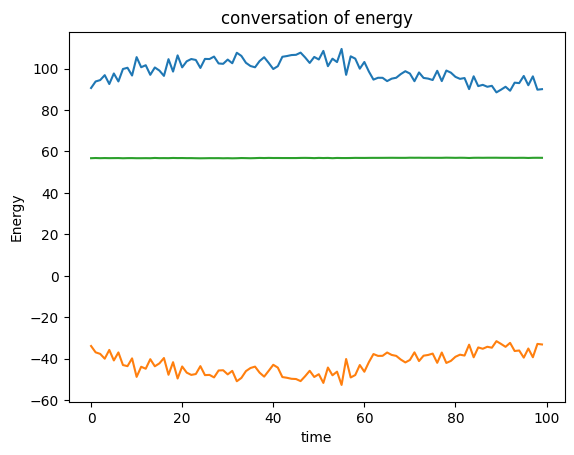

In [30]:
kinetic, potential, total, a_temp, a_P = ansambel()
plt.plot(np.arange(0, tau), kinetic, label='Kinetic Energy')
plt.plot(np.arange(0, tau), potential, label='potential Energy')
plt.plot(np.arange(0, tau), total, label='total Energy')
plt.title("conversation of energy")
plt.xlabel("time")
plt.ylabel("Energy")
plt.show()

 
102.3 x - 3.288


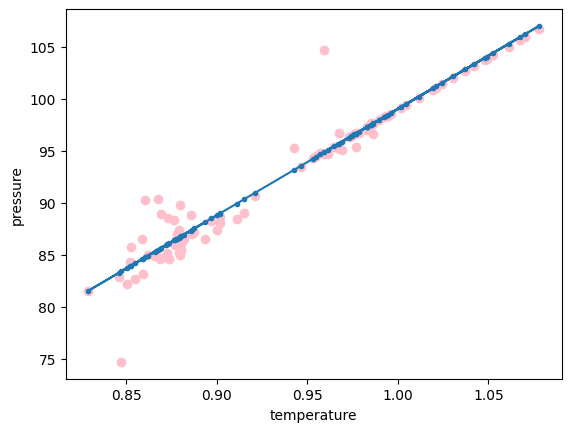

In [28]:
plt.scatter(a_temp, a_P, color='pink')
plt.xlabel('temperature')
plt.ylabel('pressure')
best_fit = np.poly1d(np.polyfit(a_temp, a_P, 1))
print(best_fit)
plt.plot(a_temp, best_fit(a_temp), '.-')
plt.show()